# Data Science Challenge

In [111]:
# If additional packages are needed that are not installed by default, uncomment the last two lines of this 
# cell and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [112]:
#Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average feeling temperature recorded for the hour ( in degree Celsius)
`hum`| Average humidity recorded for the hour (in %)
`windspeed`| Average wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [173]:
# The dataset is already loaded below
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [114]:
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [115]:
#Explore columns
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [116]:
#Description
data.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8708 non-null   int64  
 1   timestamp   8708 non-null   object 
 2   season      8708 non-null   object 
 3   holiday     8708 non-null   object 
 4   workingday  8708 non-null   object 
 5   weather     8708 non-null   object 
 6   temp        7506 non-null   float64
 7   temp_feel   8606 non-null   float64
 8   humidity    8669 non-null   float64
 9   windspeed   8508 non-null   float64
 10  demand      8708 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 748.5+ KB


In [118]:
data.isnull().sum()

id               0
timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

features with null values are temp , temp_feel, humidity, windspeed

Since Climate features such as temp, humidity and wind is related to preceeding days, we will extrapolate from that instead of averaging throughout the season

In [119]:
def fill_na_climate_values(df):
    
    cols=['temp','temp_feel','humidity','windspeed']

    for col in cols:
        for i in range(len(df[col])):
            if math.isnan(df[col][i]):
                df[col][i] = df[col][i-1]


In [120]:
fill_na_climate_values(data)


/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_21703/1122609318.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = df[col][i-1]


In [121]:
data.isnull().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
demand        0
dtype: int64

all missing values removed

In [122]:
def parse_date_time(df):
    
    timestamp_col_name = 'timestamp'
    
    from datetime import datetime
    df[timestamp_col_name]=pd.to_datetime(df[timestamp_col_name] )
    df['Month']=pd.DatetimeIndex(df[timestamp_col_name]).month
    df['Year']=pd.DatetimeIndex(df[timestamp_col_name]).year
    df['Day']=pd.DatetimeIndex(df[timestamp_col_name]).day
    df['hour']=pd.DatetimeIndex(df[timestamp_col_name]).hour
    df['minute']=pd.DatetimeIndex(df[timestamp_col_name]).minute
    df['second']=pd.DatetimeIndex(df[timestamp_col_name]).second
    df.drop(timestamp_col_name,axis=1,inplace=True)

In [123]:
parse_date_time(data)
data.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,Month,Year,Day,hour,minute,second
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589,1,2017,1,0,0,0
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879,1,2017,1,1,0,0
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736,1,2017,1,2,0,0
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949,1,2017,1,3,0,0
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000,1,2017,1,4,0,0


The id feature is the index and has no bearing on the data and can be dropped

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8708 non-null   int64  
 1   season      8708 non-null   object 
 2   holiday     8708 non-null   object 
 3   workingday  8708 non-null   object 
 4   weather     8708 non-null   object 
 5   temp        8708 non-null   float64
 6   temp_feel   8708 non-null   float64
 7   humidity    8708 non-null   float64
 8   windspeed   8708 non-null   float64
 9   demand      8708 non-null   float64
 10  Month       8708 non-null   int64  
 11  Year        8708 non-null   int64  
 12  Day         8708 non-null   int64  
 13  hour        8708 non-null   int64  
 14  minute      8708 non-null   int64  
 15  second      8708 non-null   int64  
dtypes: float64(5), int64(7), object(4)
memory usage: 1.1+ MB


Object values will have to encoded for the model to be able to use it as inputs

Categorical data to be encoded are season, holiday, workingday and weather

In [125]:
def data_encode(df):
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    df['season'] = le.fit_transform(df['season'])
    df['holiday'] = le.fit_transform(df['holiday'])
    df['workingday'] = le.fit_transform(df['workingday'])
    df['weather'] = le.fit_transform(df['weather'])


In [126]:
data_encode(data)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8708 non-null   int64  
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   temp_feel   8708 non-null   float64
 7   humidity    8708 non-null   float64
 8   windspeed   8708 non-null   float64
 9   demand      8708 non-null   float64
 10  Month       8708 non-null   int64  
 11  Year        8708 non-null   int64  
 12  Day         8708 non-null   int64  
 13  hour        8708 non-null   int64  
 14  minute      8708 non-null   int64  
 15  second      8708 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 1.1 MB


In [128]:
data.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,Month,Year,Day,hour,minute,second
0,1,1,0,0,0,9.84,14.395,81.0,0.0,2.772589,1,2017,1,0,0,0
1,2,1,0,0,0,9.02,13.635,80.0,0.0,3.688879,1,2017,1,1,0,0
2,3,1,0,0,0,9.02,13.635,80.0,0.0,3.465736,1,2017,1,2,0,0
3,4,1,0,0,0,9.84,14.395,75.0,0.0,2.564949,1,2017,1,3,0,0
4,5,1,0,0,0,9.84,14.395,75.0,0.0,0.000000,1,2017,1,4,0,0


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity'>

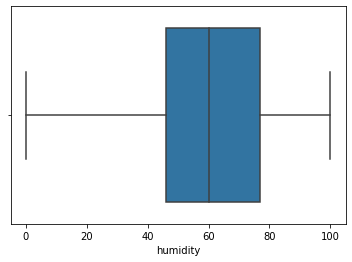

In [142]:
sns.boxplot(data['humidity'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp_feel'>

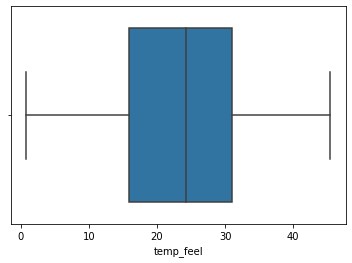

In [143]:
sns.boxplot(data['temp_feel'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

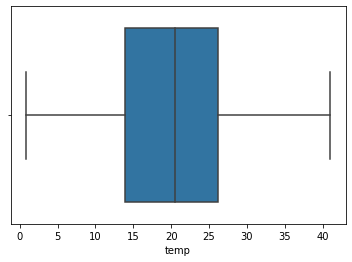

In [144]:
sns.boxplot(data['temp'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

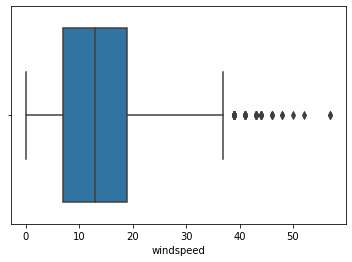

In [141]:
sns.boxplot(data['windspeed'])

In [139]:
Q1 = np.percentile(data['windspeed'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['windspeed'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['windspeed'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -10.99805
upper limit: 37.00075


In [145]:
data=data[data.windspeed<up_lim]
data=data[data.windspeed>low_lim]

## Visualization, Modeling, Machine Learning

Build a model that can predict hourly demand and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

In [129]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


<AxesSubplot:>

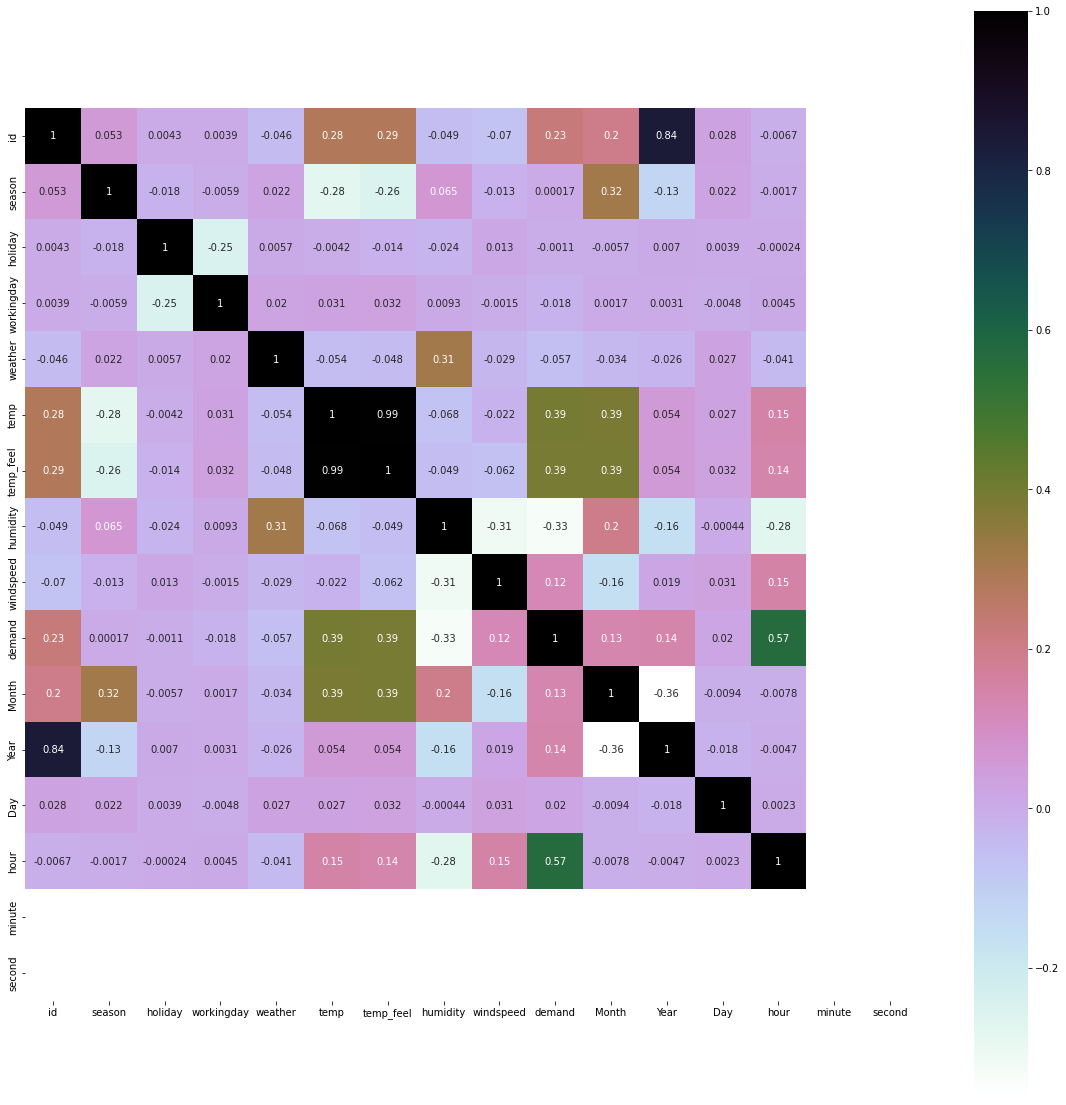

In [136]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

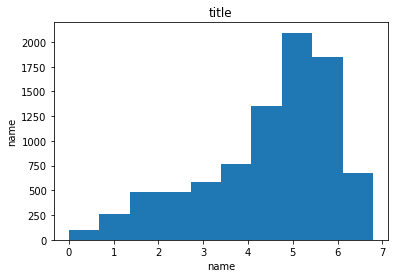

In [152]:
plt.hist(data['demand'])
plt.title('Range of demand')
plt.show()

In [130]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(data, test_size=0.25)

In [132]:
trainx=data.drop('demand',axis=1)
trainy=data['demand']
testx=test.drop(['demand'],axis=1)
testy=test['demand']

In [134]:
import xgboost
from xgboost import XGBRegressor
# from sklearn.ensemble import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = XGBRegressor(objective ='reg:squarederror',
                     n_estimators=1000, max_depth=3, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state = 42)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(trainx, trainy)
pipe.predict(testx)
pipe.score(testx, testy)

0.9681994364077395

In [147]:
print(model.feature_importances_) 

[0.02948306 0.00892098 0.01099724 0.14452548 0.03835491 0.044185
 0.10531478 0.04468454 0.00811918 0.02752904 0.09453251 0.00585681
 0.43749645 0.         0.        ]


In [146]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


df_pred = pipe.predict(testx)
print("Model Metrics : ")
print("------------------")
print("Accuracy: ", pipe.score(testx,testy))
print("Mean Absolute Error: ",mean_absolute_error(testy , df_pred))
print("Mean Squared Error: " ,mean_squared_error(testy,df_pred))
print("R-squared score: ", r2_score(testy,df_pred))

Model Metrics : 
------------------
Accuracy:  0.9681994364077395
Mean Absolute Error:  0.18367177236059426
Mean Squared Error:  0.07187049651059949
R-squared score:  0.9681994364077395




**Identify the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


[0.02948306 0.00892098 0.01099724 0.14452548 0.03835491 0.044185
 0.10531478 0.04468454 0.00811918 0.02752904 0.09453251 0.00585681
 0.43749645 0.         0.        ]


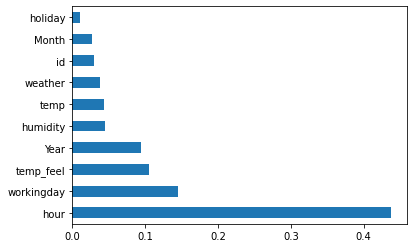

In [148]:
print(model.feature_importances_) 


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `demand` variable. Submit a CSV file with a header row and one row per test entry.
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **demand**

In [176]:
fill_na_climate_values(test)
parse_date_time(test)
data_encode(test)

In [177]:
final_predictions = pipe.predict(test)

In [184]:
submission_df = pd.DataFrame(final_predictions)

In [179]:
submission_df.head()

,0
0,2.565681
1,3.332573
2,5.066491
3,5.497429
4,5.765892


In [194]:
submission_df = submission_df.rename(columns = {0:'demand'})

In [196]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

### Model Metrics : 
------------------
- Accuracy:  0.9681994364077395    ->     96.81%
- Mean Absolute Error:  0.18367177236059426
- Mean Squared Error:  0.07187049651059949
- R-squared score:  0.9681994364077395